Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

In [2]:
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

Define layer name

In [3]:
folder_name = 'label_10'

Label 02

In [4]:
cols = list(pd.read_csv(f"{folder_name}/train.csv", nrows=1))
train_data = pd.read_csv(f"{folder_name}/train.csv",usecols =[i for i in cols if i not in ["label_1", "label_3", "label_4"]])
train_data.shape

(28520, 769)

Handling missing values

In [5]:
train_data = train_data.dropna()
print(train_data.shape)
train_data.head()

(28040, 769)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_2
480,0.053179,0.094833,-0.098983,0.131190,-0.031974,-0.049086,0.038929,0.091135,-0.107005,0.018532,...,-0.008309,0.096050,-0.319057,-0.084282,0.057429,-0.064677,0.017584,-0.007926,-0.144536,25.0
481,0.033278,0.059124,-0.020353,0.168918,0.036165,-0.117302,-0.081979,-0.070096,-0.161345,0.106618,...,0.002962,0.003712,-0.235858,-0.051955,0.121809,0.007508,0.074416,0.000140,0.115385,25.0
482,0.046853,0.076299,-0.012859,0.089680,0.046729,-0.000054,-0.045814,0.023595,-0.104441,0.025995,...,0.027111,0.087195,-0.142816,-0.202896,0.099567,-0.069376,0.061420,0.003834,0.000445,25.0
483,0.001946,0.060066,0.012458,0.001349,-0.057288,-0.219725,0.001473,0.036990,-0.210818,0.055353,...,0.013749,-0.041319,-0.207143,-0.175213,-0.030503,-0.081459,0.106127,0.039627,0.025073,25.0
484,0.046541,0.113568,-0.009204,0.058154,0.027733,-0.095826,0.072213,-0.013832,-0.007329,0.074815,...,0.016530,0.109589,-0.095758,-0.142571,0.081530,-0.058456,-0.049127,-0.061282,0.041392,25.0


numbers of missing values neglegible 

Import test data set

In [6]:
cols = list(pd.read_csv(f"{folder_name}/valid.csv", nrows=1))
valid_data = pd.read_csv(f"{folder_name}/valid.csv",usecols =[i for i in cols if i not in ["label_1", "label_3", "label_4"]])
valid_data.shape

(750, 769)

Handling missing values

In [7]:
valid_data = valid_data.dropna()
valid_data.shape

(736, 769)

In [8]:
#features
X_train = train_data.iloc[:,:-1]
Y_train = train_data.iloc[:,-1]
X_valid = valid_data.iloc[:,:-1]
Y_valid = valid_data.iloc[:,-1]

Standarization

In [9]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)

X_train_scaler = robust_scaler.transform(X_train)
X_valid_scaler = robust_scaler.transform(X_valid)

Dimensionality reduction

In [10]:
pca = PCA(0.95)
pca = pca.fit(X_train_scaler)

X_train_pca = pca.transform(X_train_scaler)
X_valid_pca = pca.transform(X_valid_scaler)
X_train_pca.shape

(28040, 270)

oversampling and undersampling

<Axes: title={'center': 'Count of Label_2'}>

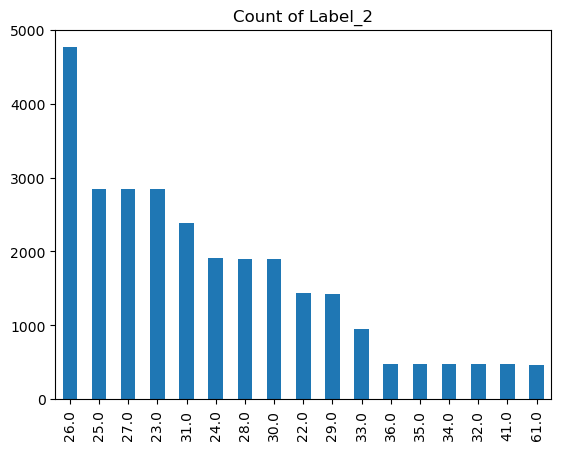

In [11]:
train_data['label_2'].value_counts().plot(kind='bar',title='Count of Label_2')

(80902, 270)


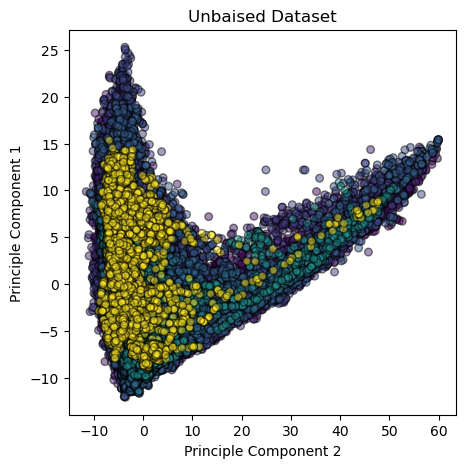

In [12]:
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
X_train_smt, Y_train_smt = smotetomek.fit_resample(X_train_pca, Y_train)
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_smt, Y_train_smt, ax, title='Unbaised Dataset')
print(X_train_smt.shape)

Using SVC

In [13]:
from sklearn.svm import SVC

In [14]:
svc = SVC()
svc.fit(X_train_scaler,Y_train)
svc_predicted = svc.predict(X_valid_scaler)
accuracy_score(Y_valid,svc_predicted)

0.9293478260869565

After feature engineering

In [15]:
svc_fe = SVC()
svc_fe.fit(X_train_smt, Y_train_smt)
svc_predicted = svc_fe.predict(X_valid_pca)
accuracy_score(Y_valid,svc_predicted)

0.936141304347826

Hyper Parameter tuning without dimentionality reduction

In [16]:
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(X_train_pca, Y_train)

# # print best parameter after tuning
# print(grid.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [17]:
# grid.fit(X_train_smt, Y_train_smt)
# grid_predictions = grid.predict(X_valid_pca)
  
# # print classification report
# accuracy_score(Y_valid, grid_predictions)

In [18]:
cols = list(pd.read_csv(f"{folder_name}/test.csv", nrows=1))
test_data = pd.read_csv(f"{folder_name}/test.csv",usecols =[i for i in cols if i not in ["label_1", "label_3", "label_4"]])
#features
X_test = test_data.iloc[:,1:]
X_test.head()

X_test_scaler = robust_scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

grid_predictions = svc_fe.predict(X_test_pca)
grid_predictions

array([22., 25., 30., 27., 29., 30., 27., 33., 23., 22., 26., 25., 27.,
       26., 23., 26., 28., 25., 31., 29., 33., 24., 29., 22., 26., 26.,
       28., 23., 25., 26., 23., 30., 30., 24., 28., 33., 24., 25., 26.,
       25., 23., 23., 25., 30., 31., 22., 26., 32., 25., 23., 22., 24.,
       29., 27., 23., 23., 30., 34., 28., 25., 30., 23., 23., 26., 28.,
       25., 25., 25., 22., 32., 33., 28., 61., 30., 23., 23., 26., 26.,
       27., 26., 34., 32., 23., 23., 23., 28., 31., 23., 26., 23., 22.,
       31., 25., 24., 27., 30., 31., 25., 27., 29., 23., 22., 26., 22.,
       24., 36., 26., 26., 32., 25., 27., 27., 28., 24., 30., 30., 26.,
       25., 23., 26., 27., 26., 41., 33., 32., 28., 29., 35., 34., 24.,
       23., 27., 36., 23., 28., 22., 22., 27., 30., 31., 26., 27., 26.,
       31., 23., 30., 30., 24., 33., 30., 29., 27., 23., 24., 31., 30.,
       23., 25., 28., 41., 31., 25., 25., 28., 30., 26., 30., 26., 26.,
       25., 23., 27., 31., 30., 33., 31., 25., 34., 30., 23., 27

In [19]:
size = grid_predictions.size
index = []
for i in range(size):
    index.append(i+1)
data = {
    'ID': index,
    'label_2': grid_predictions
}
df = pd.DataFrame(data)
df.to_csv('10-2.csv', index=False)